# Project EDA about Heart Disease Dataset

## Step 1: Data Selection
I have selected the heart disease dataset from kaggle, which includes features such as { age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression, ST slope } and the presence or absence of heart disease.

## Step 2: Initial Questions
### There is some questions I would like to investigate based on the dataset:

- How does age correlate with the occurrence of heart disease?
- Are there any differences in heart disease prevalence between males and females?
- What is the distribution of chest pain types among individuals with and without heart disease?
- Are there any correlations between resting blood pressure, cholesterol levels, and heart disease?
- How does the maximum heart rate achieved during exercise differ for individuals with and without heart disease?

## Loading Packeges and data

In [1]:
# Loading packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

#

import math
import random
import os
import time

from numpy import interp

# Disabling warnings:

import warnings
warnings.filterwarnings('ignore') 

# Styling:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

# Seeding:

def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

# Reading csv file:

train = pd.read_csv('heart.csv')

# Renaming columns
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'old_peak', 'st_slope', 'heart_diasease']



### See the head of data

In [2]:
train.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,heart_diasease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


### See the count of columns and rows 

In [3]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

Train data has 12 features, 746 observations.
Train features are:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'old_peak', 'st_slope', 'heart_diasease']



### Checking null values

In [4]:
train.isnull().sum().sum()

0

### Number of unique train observartions

In [5]:
train.nunique()

age                         49
sex                          2
chest_pain_type              4
resting_blood_pressure      63
cholesterol                221
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved    109
exercise_induced_angina      2
old_peak                    43
st_slope                     3
heart_diasease               2
dtype: int64

### Renaming cateorical data for easier understanding


In [6]:
train['sex'] = train['sex'].map({'F':'female','M':'male'})

train['chest_pain_type'] = train['chest_pain_type'].map({'ASY':'asymptomatic', 'ATA':'atypical_angina', 'NAP':'non_anginal_pain', 'TA':'typical_angina'})

train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/dl',1:'greater_than_120mg/dl'})

train['rest_ecg'] = train['rest_ecg'].map({'Normal':'normal','ST':'ST-T_wave_abnormality','LVH':'left_ventricular_hypertrophy'})

train['exercise_induced_angina'] = train['exercise_induced_angina'].map({'N':'no','Y':'yes'})

train['st_slope'] = train['st_slope'].map({'Up':'upsloping','Flat':'flat','Down':'downsloping'})

train['heart_diasease'] = train['heart_diasease'].map({0:'no_disease', 1:'has_disease'})

train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,heart_diasease
0,56,male,asymptomatic,120,85,less_than_120mg/dl,normal,140,no,0.0,upsloping,no_disease
1,52,male,atypical_angina,140,100,less_than_120mg/dl,normal,138,yes,0.0,upsloping,no_disease
2,56,male,asymptomatic,120,100,less_than_120mg/dl,normal,120,yes,1.5,flat,has_disease
3,69,male,asymptomatic,140,110,greater_than_120mg/dl,normal,109,yes,1.5,flat,has_disease
4,76,male,non_anginal_pain,104,113,less_than_120mg/dl,left_ventricular_hypertrophy,120,no,3.5,downsloping,has_disease


### Displaying cateorical distribution

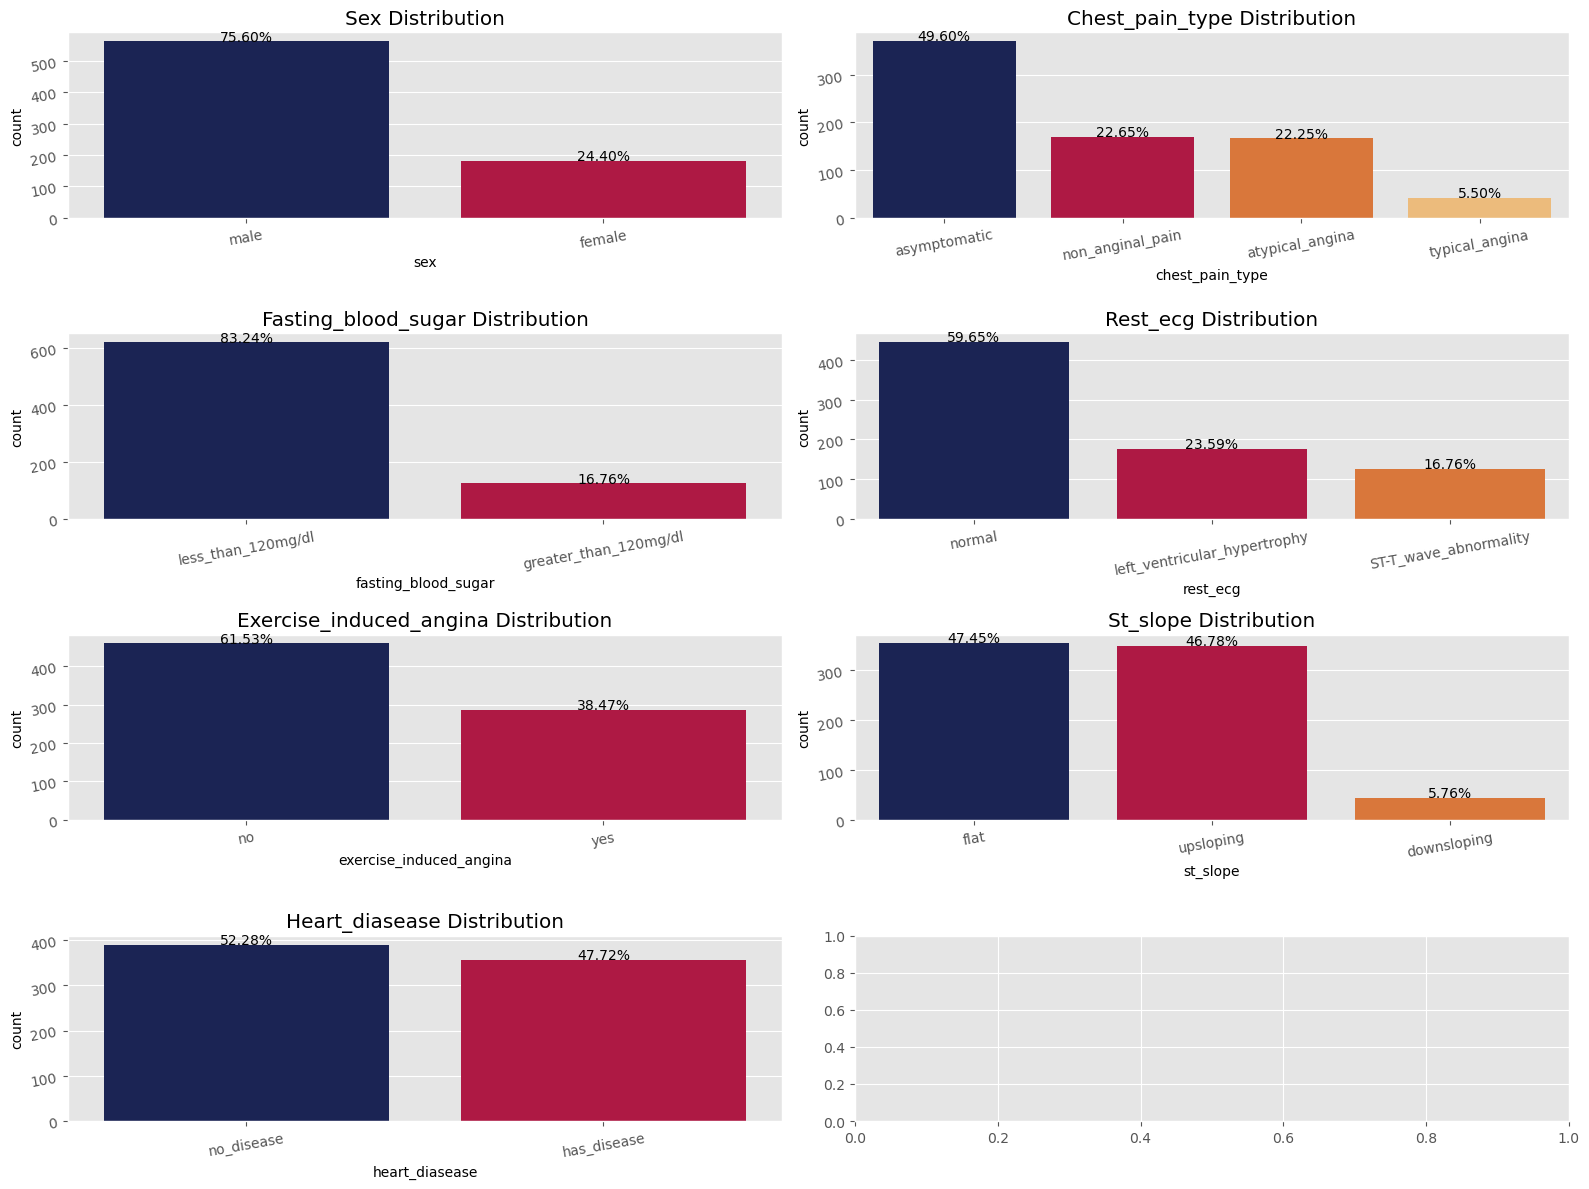

In [7]:
def ctg_dist(df, cols, hue=None,rows=4, columns=2):
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()
        

ctg_dist(train, ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope','heart_diasease'])


### Categorical Data
Here we can do these observations:
- Males in the data set account for about three-quarters of the data set.
- Most common ches pain type is 'Asymptomatic' ones which is almost 50% of the data
- 83% of the patients has normal levels of fasting blood sugar.
- 60% of the patients has normal Resing electrocardiographic distributions 
- 61% of the patients had no exercise induced angina
- Peak exercise slope seems mainly divided between flat and upsloping.

### Displaying numeric distribution



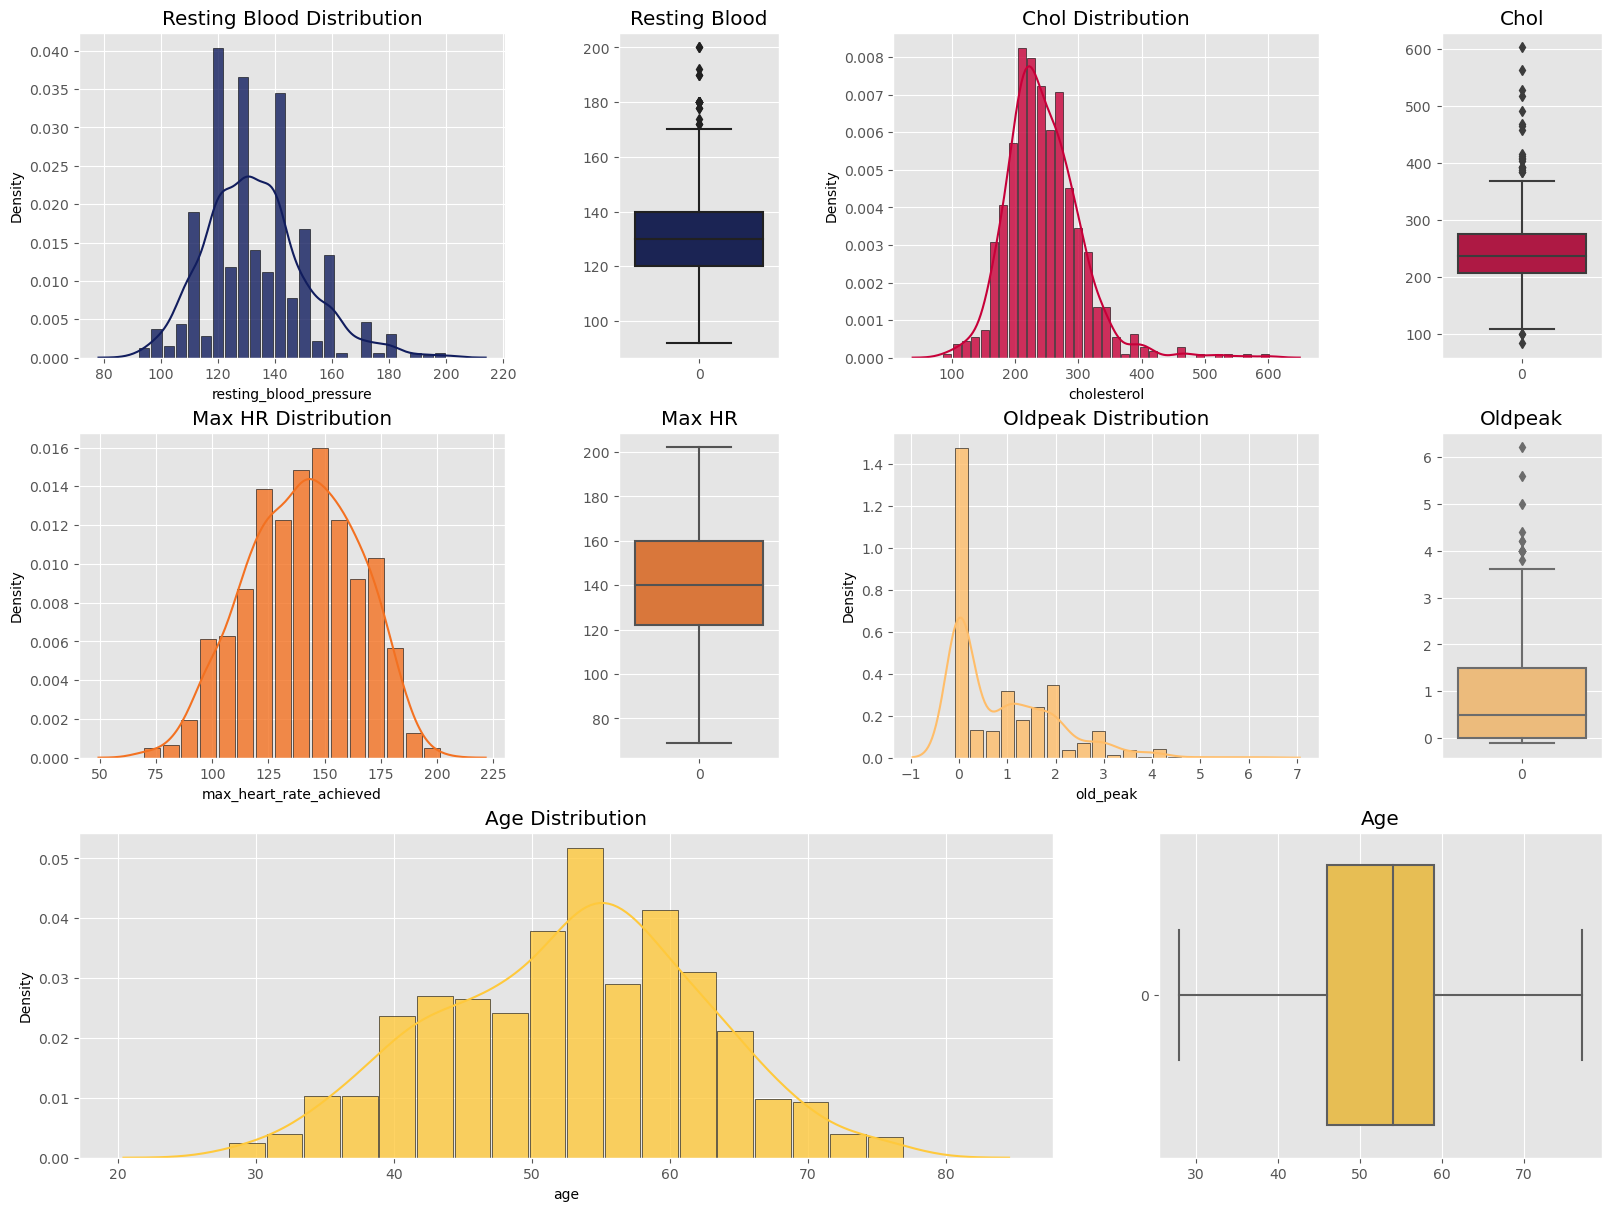

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Resting Blood Distribution')            
sns.distplot(train['resting_blood_pressure'],                
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])
ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Resting Blood')
sns.boxplot(train['resting_blood_pressure'], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')
sns.distplot(train['cholesterol'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])
ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')
sns.boxplot(train['cholesterol'], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Max HR Distribution')
sns.distplot(train['max_heart_rate_achieved'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])
ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Max HR')
sns.boxplot(train['max_heart_rate_achieved'], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')
sns.distplot(train['old_peak'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])
ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak')
sns.boxplot(train['old_peak'], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')
sns.distplot(train['age'],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])
ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age')
sns.boxplot(train['age'], orient='h', color=cust_palt[4])

plt.show()

### Observartions
#### Most of the continuous variables exhibit a somewhat close-to-Gaussian distribution with slight left or right skews, except for oldpeak. However, there are some outliers, particularly a significant one in Cholesterol.

#### outliers in resting_blood_pressure are
- 172     2,
- 174     1,
- 178     2,
- 180    10,
- 190     2,
- 192     1,
- 200     2,
#### outliers in cholestrol are
- 85     1,
- 100    2,
- 384    1,
- 385    1,
- 388    1,
- 392    1,
- 393    1,
- 394    2,
- 404    1,
- 407    1,
- 409    1,
- 412    1,
- 417    1,
- 458    1,
- 466    1,
- 468    1,
- 491    1,
- 518    1,
- 529    1,
- 564    1,
- 603    1,
#### outliers in oldpeak are
- 3.8    1,
- 4.0    8,
- 4.2    2,
- 4.4    1,
- 5.0    1,
- 5.6    1,
- 6.2    1,

In [9]:
# Masks for easier selection in future:

categorical = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope','heart_diasease']
continuous = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','old_peak']

### Categorical data vs Target
Here we can do these observations:
- Males are much more likely for heart diseases
- Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.
- Blood sugar has no direct effect on the disease.
- Rest ECG results showing no direct results but having normal ECG is pretty good sign.
- Having exercise induced angina is pretty strong indicator for heart disease, patients are almost 3 times more likely to have disease if they have exercise induced angina. 
- Patients who had flat slope distribution are more likely to have disease. and patients who had upsloping distribution are more likely 'not' to have disease.

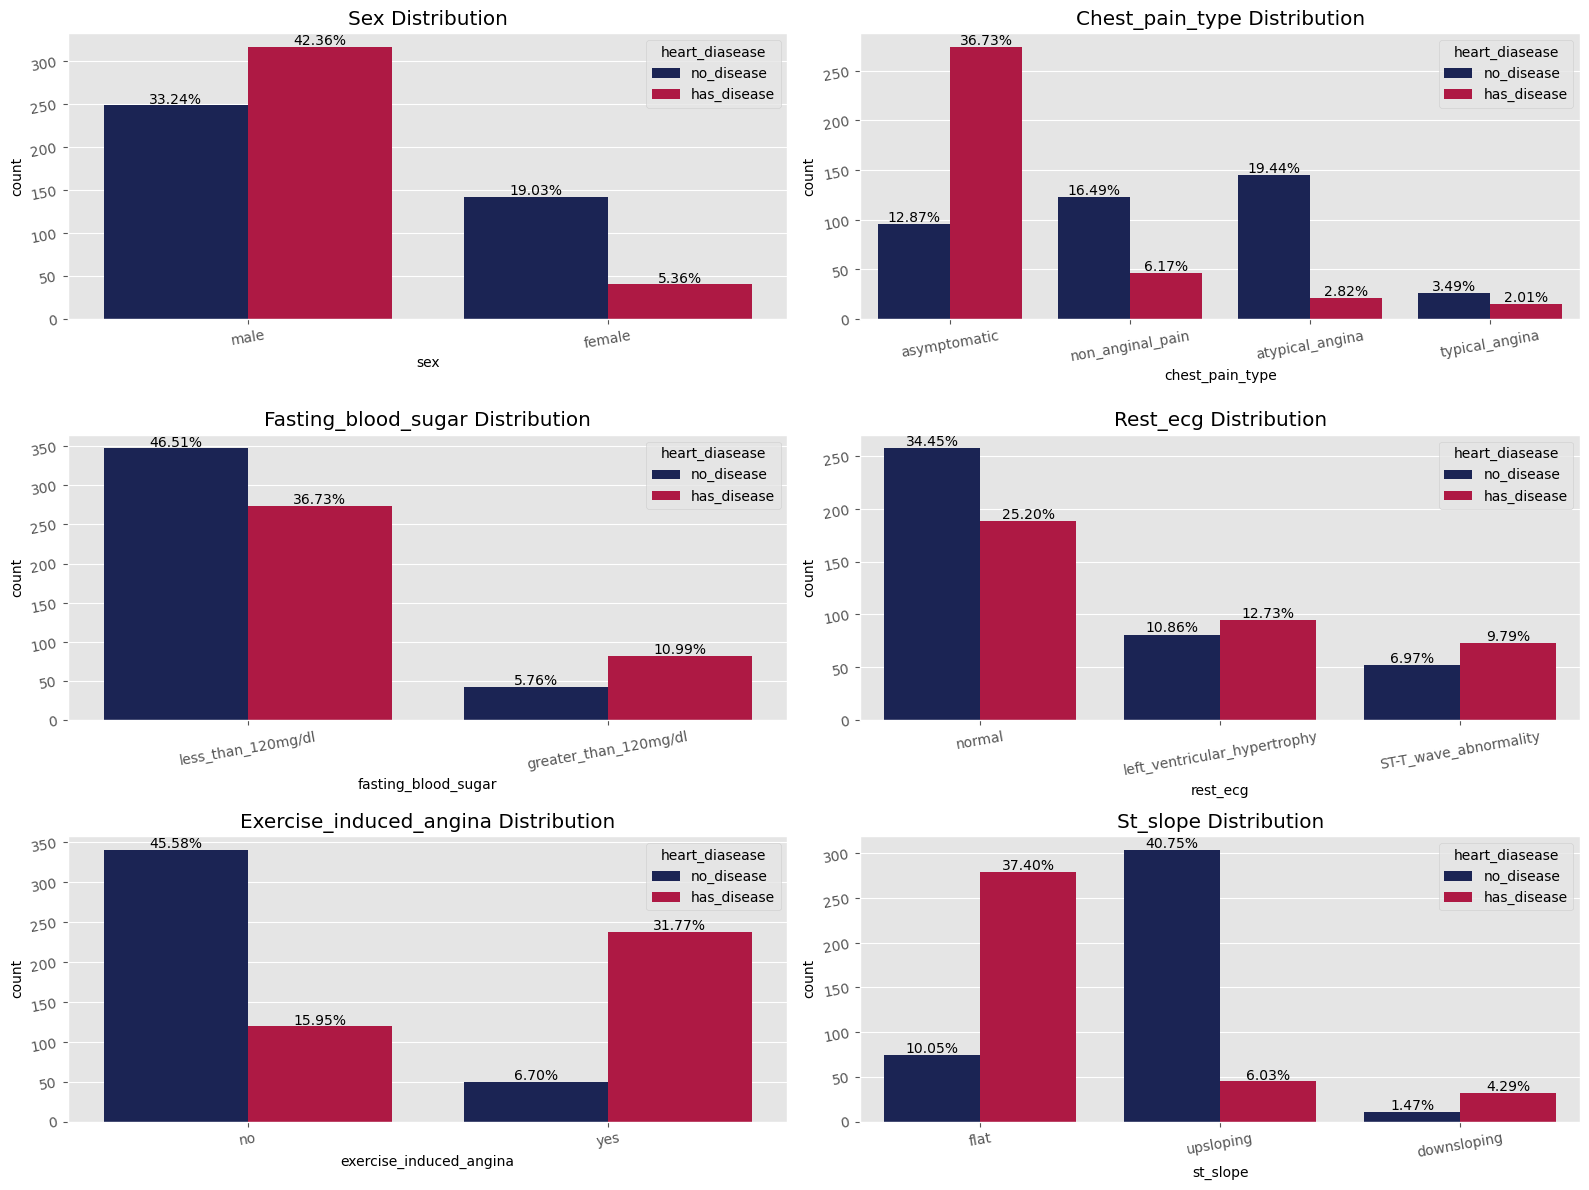

In [10]:
ctg_dist(train, categorical[:-1], 'heart_diasease', 3, 2)

### Numeric data vs Target


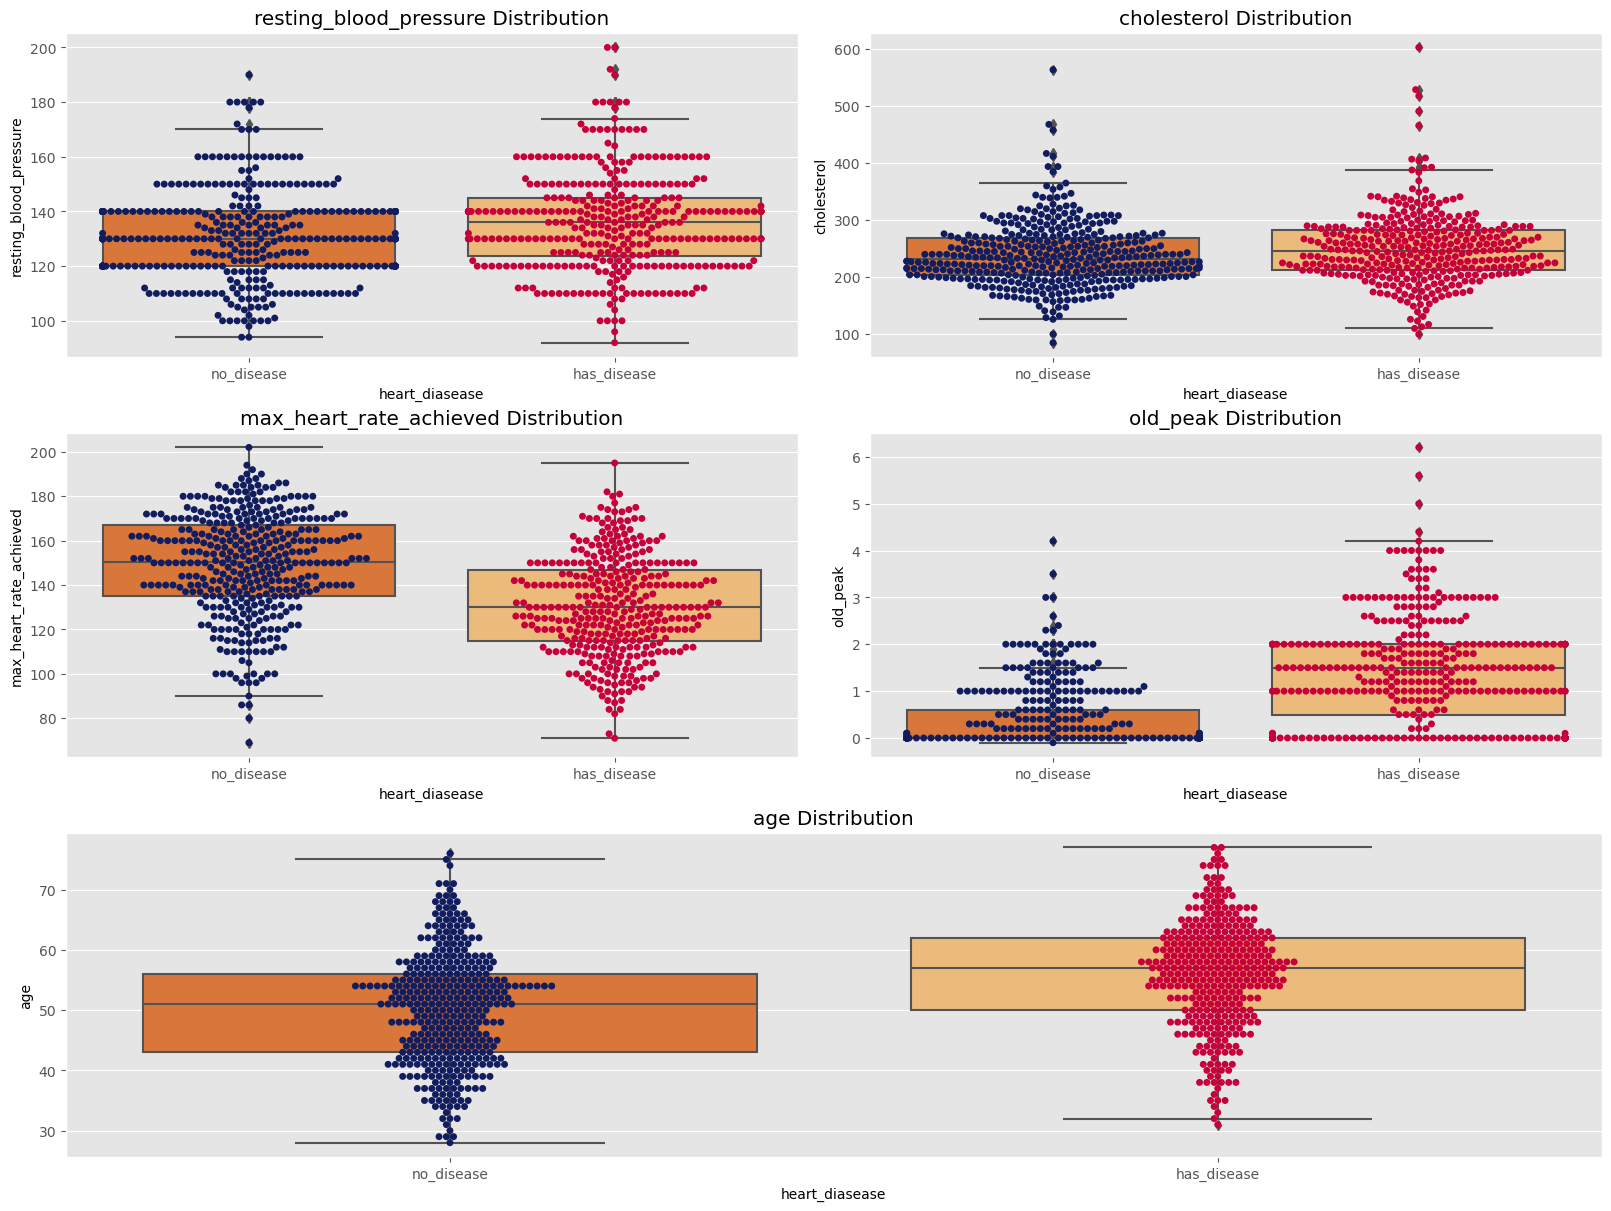

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='heart_diasease',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='heart_diasease',
                    y='resting_blood_pressure',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='heart_diasease',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='heart_diasease',
                    y='cholesterol',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='heart_diasease',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='heart_diasease',
                    y='max_heart_rate_achieved',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('old_peak Distribution')

sns.boxplot(x='heart_diasease',
                    y='old_peak',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='heart_diasease',
                    y='old_peak',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='heart_diasease',
                    y='age',
                    data=train,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='heart_diasease',
                    y='age',
                    data=train,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()

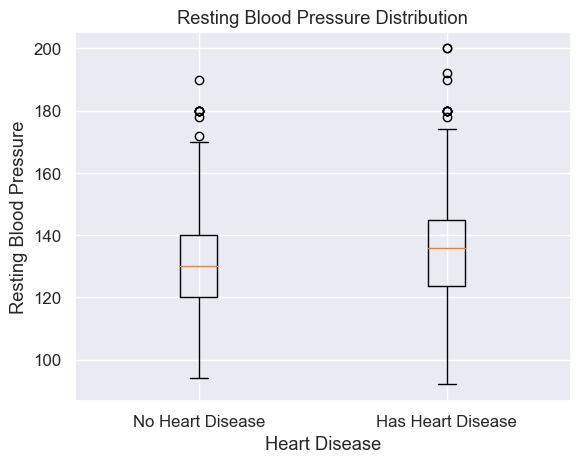

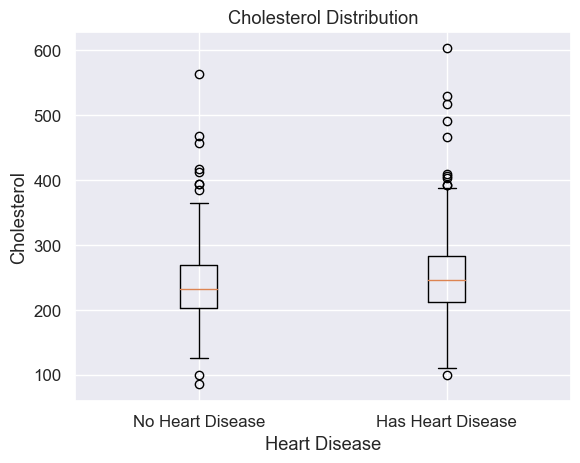

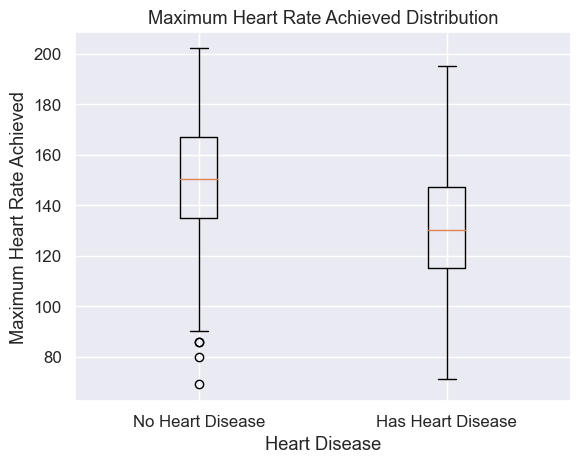

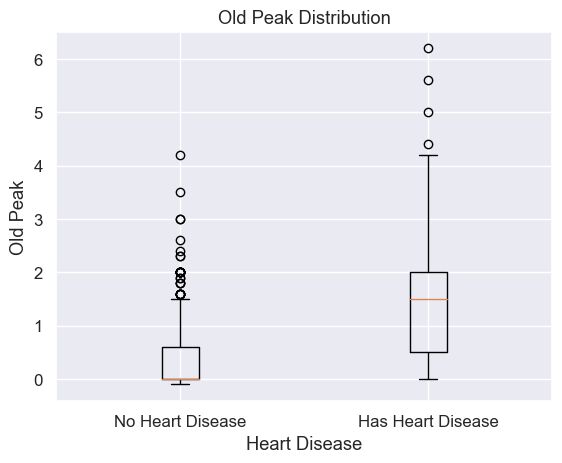

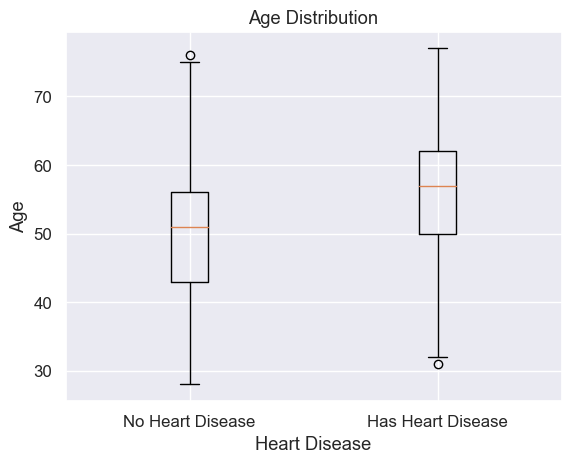

In [26]:
import matplotlib.pyplot as plt

# Resting Blood Pressure Distribution
plt.figure()
plt.boxplot([train[train['heart_diasease'] == 'no_disease']['resting_blood_pressure'],
             train[train['heart_diasease'] == 'has_disease']['resting_blood_pressure']])
plt.xticks([1, 2], ['No Heart Disease', 'Has Heart Disease'])
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Cholesterol Distribution
plt.figure()
plt.boxplot([train[train['heart_diasease'] == 'no_disease']['cholesterol'],
             train[train['heart_diasease'] == 'has_disease']['cholesterol']])
plt.xticks([1, 2], ['No Heart Disease', 'Has Heart Disease'])
plt.title('Cholesterol Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

# Maximum Heart Rate Achieved Distribution
plt.figure()
plt.boxplot([train[train['heart_diasease'] == 'no_disease']['max_heart_rate_achieved'],
             train[train['heart_diasease'] == 'has_disease']['max_heart_rate_achieved']])
plt.xticks([1, 2], ['No Heart Disease', 'Has Heart Disease'])
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

# Old Peak Distribution
plt.figure()
plt.boxplot([train[train['heart_diasease'] == 'no_disease']['old_peak'],
             train[train['heart_diasease'] == 'has_disease']['old_peak']])
plt.xticks([1, 2], ['No Heart Disease', 'Has Heart Disease'])
plt.title('Old Peak Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Old Peak')
plt.show()

# Age Distribution
plt.figure()
plt.boxplot([train[train['heart_diasease'] == 'no_disease']['age'],
             train[train['heart_diasease'] == 'has_disease']['age']])
plt.xticks([1, 2], ['No Heart Disease', 'Has Heart Disease'])
plt.title('Age Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


### Numeric data vs Target observations

Based on the provided statistics, we can draw the following findings:
 
### Resting Blood Pressure:

- The minimum and maximum resting blood pressure values are higher for individuals with heart disease compared to those without heart disease.
- Having higher resting blood pressure shows you are little bit more likely to have heart disease.

### Cholesterol:
 
- The minimum and maximum cholesterol values are higher for individuals with heart disease compared to those without heart disease.
- patients are little bit more likely to have disease with high cholesterol.

### Maximum Heart Rate Achieved:
 
- The median maximum heart rate achieved is lower for individuals with heart disease compared to those without heart disease.

### Old Peak:
 
- The range of old peak values is larger for individuals with heart disease compared to those without heart disease.

### Age:

- older patients are more likely to have heart disease.
- The median age is slightly higher for individuals with heart disease.


############

In [16]:
# Loading data again

heat_train = pd.read_csv('heart.csv')

from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()

for feature in features:
    heat_train[feature] = le.fit_transform(heat_train[feature])

heat_train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'old_peak', 'st_slope', 'heart_diasease']
heat_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,heart_diasease
0,56,1,0,120,85,0,1,140,0,0.0,2,0
1,52,1,1,140,100,0,1,138,1,0.0,2,0
2,56,1,0,120,100,0,1,120,1,1.5,1,1
3,69,1,0,140,110,1,1,109,1,1.5,1,1
4,76,1,2,104,113,0,0,120,0,3.5,0,1


### Correlation heatmap between variables

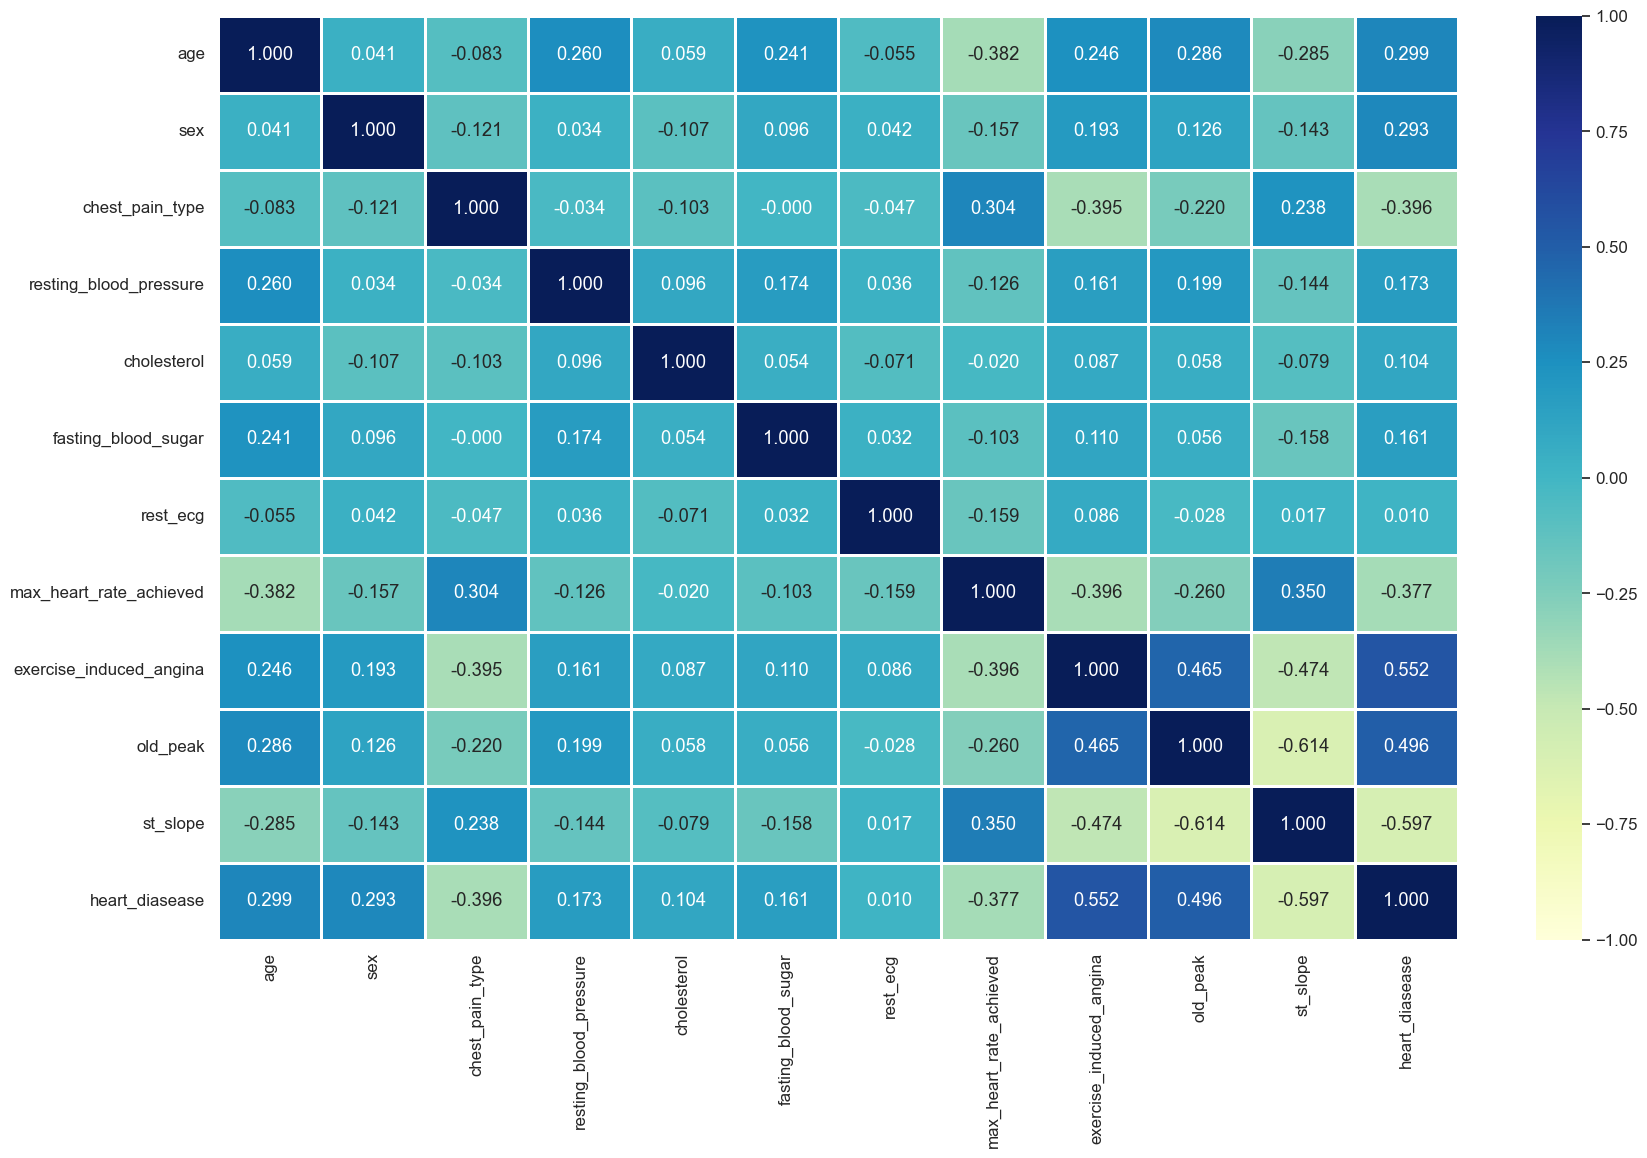

In [17]:
sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='YlGnBu',  # Change the colormap to 'YlGnBu'
            linewidths=1,
            cbar=True,
            vmin=-1, vmax=1,  # Adjust the color range to cover the full spectrum of correlation values
            center=0,  # Set the center of the colorbar to zero
            robust=True)  # Enhance the contrast by limiting the color range to the actual data range

plt.show()


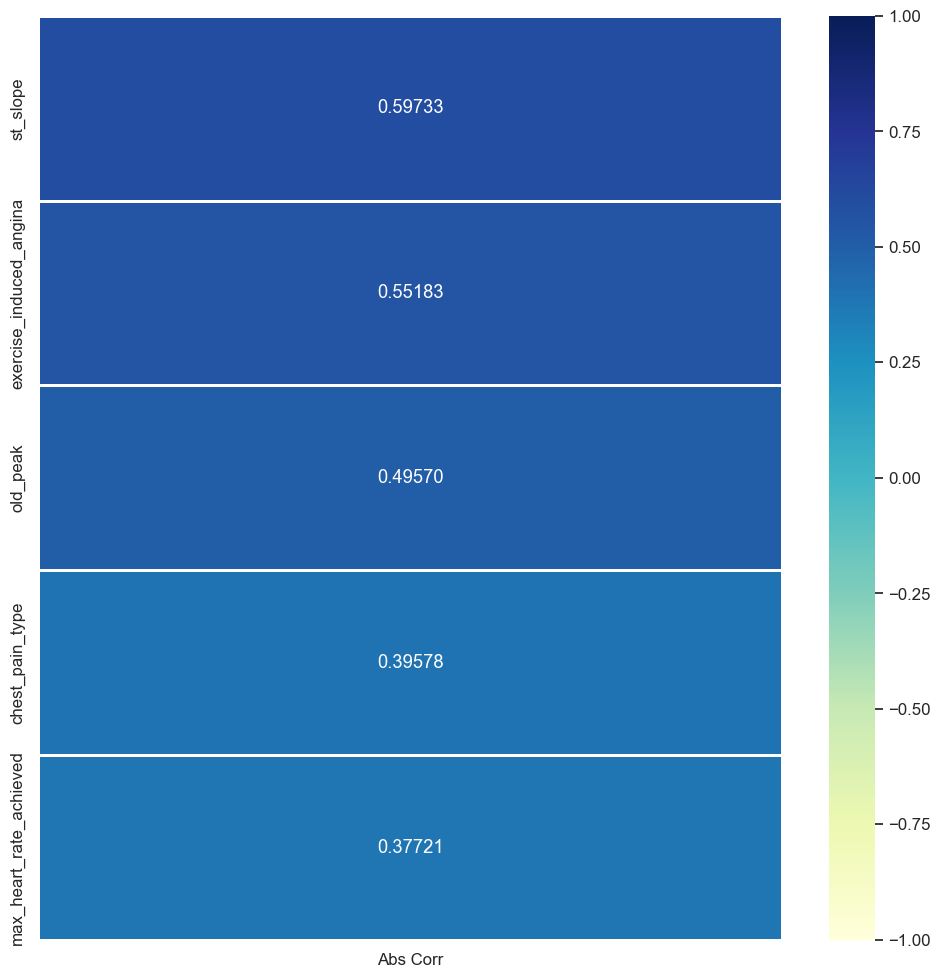

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = heat_train.corrwith(heat_train['heart_diasease']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations >= 0.35],
            cmap='YlGnBu',  # Change the colormap to 'YlGnBu'
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1,
            fmt='.5f',
            ax=ax)

plt.show()


In [19]:
print(sorted_correlations)


st_slope                   0.597334
exercise_induced_angina    0.551834
old_peak                   0.495696
chest_pain_type            0.395776
max_heart_rate_achieved    0.377212
age                        0.298617
sex                        0.292779
resting_blood_pressure     0.173242
fasting_blood_sugar        0.160594
cholesterol                0.103866
rest_ecg                   0.009935
Name: Abs Corr, dtype: float64


Based on the provided correlation heatmap between variables, the following correlations can be observed:

#### Strong positive correlations:

- st_slope and exercise_induced_angina: 0.597334
- exercise_induced_angina and old_peak: 0.551834
#### Moderate positive correlations:

- old_peak and chest_pain_type: 0.495696
- chest_pain_type and max_heart_rate_achieved: 0.395776
- max_heart_rate_achieved and age: 0.377212
#### Weak positive correlations:

- age and sex: 0.292779
- age and resting_blood_pressure: 0.298617
#### Weak positive correlations:

- resting_blood_pressure and fasting_blood_sugar: 0.173242
- fasting_blood_sugar and cholesterol: 0.160594
- cholesterol and rest_ecg: 0.103866
- rest_ecg and target: 0.009935

These correlations provide insights into the relationships between different variables. For example, there is a strong positive correlation between the st_slope and exercise_induced_angina variables, indicating that as the st_slope increases, the likelihood of exercise-induced angina also increases. Similarly, there are moderate positive correlations between old_peak and chest_pain_type, and between chest_pain_type and max_heart_rate_achieved, suggesting potential associations between these variables.

Further analysis and interpretation of these correlations can help in understanding the interplay between different features and their impact on the occurrence of heart disease.

In [20]:
import pandas as pd

correlations = heat_train.corrwith(heat_train['heart_diasease']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
print(sorted_correlations)


st_slope                   0.597334
exercise_induced_angina    0.551834
old_peak                   0.495696
chest_pain_type            0.395776
max_heart_rate_achieved    0.377212
age                        0.298617
sex                        0.292779
resting_blood_pressure     0.173242
fasting_blood_sugar        0.160594
cholesterol                0.103866
rest_ecg                   0.009935
Name: Abs Corr, dtype: float64


- ST Slope: Positive correlation (strong)
- Exercise Induced Angina: Positive correlation (strong)
######
- The rest features are 'Positive correlation' 

###  These correlation values indicate the strength and direction of the linear relationship between each variable and the target. Positive values indicate a positive correlation, meaning that as the variable increases, the target also tends to increase.  The correlation coefficient ranges from -1 to 1, with values closer to -1 or 1 indicating a stronger correlation.
 
- In this case, the variables "ST Slope" and "Exercise Induced Angina" show relatively stronger positive correlations
 with the target variable compared to the other variables.






### Are there any differences in heart disease prevalence between males and females?

In [34]:
train.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,heart_diasease
0,56,male,asymptomatic,120,85,less_than_120mg/dl,normal,140,no,0.0,upsloping,no_disease
1,52,male,atypical_angina,140,100,less_than_120mg/dl,normal,138,yes,0.0,upsloping,no_disease
2,56,male,asymptomatic,120,100,less_than_120mg/dl,normal,120,yes,1.5,flat,has_disease
3,69,male,asymptomatic,140,110,greater_than_120mg/dl,normal,109,yes,1.5,flat,has_disease
4,76,male,non_anginal_pain,104,113,less_than_120mg/dl,left_ventricular_hypertrophy,120,no,3.5,downsloping,has_disease


In [35]:
import pandas as pd

# Calculate the total number of males and females
total_males = train[train['sex'] == 'male'].shape[0]
total_females = train[train['sex'] == 'female'].shape[0]

# Calculate the number of males and females with heart disease
males_with_heart_disease = train[(train['sex'] == 'male') & (train['heart_diasease'] == 'has_disease')].shape[0]
females_with_heart_disease = train[(train['sex'] == 'female') & (train['heart_diasease'] == 'has_disease')].shape[0]

# Calculate the prevalence of heart disease in males and females
prevalence_males = males_with_heart_disease / total_males
prevalence_females = females_with_heart_disease / total_females

# Convert prevalence values to percentage format
prevalence_males_percent = prevalence_males * 100
prevalence_females_percent = prevalence_females * 100

# Print the results with percentage format
print("Heart Disease Prevalence:")
print("Males: {:.0f}%".format(prevalence_males_percent))
print("Females: {:.0f}%".format(prevalence_females_percent))

Heart Disease Prevalence:
Males: 56%
Females: 22%


According to the calculations, the prevalence of heart disease among males is approximately 56%, while among females it is approximately 22%.
These results suggest that there may be a higher prevalence of heart disease among males compared to females in the given dataset.

In [36]:
import plotly.graph_objects as go

# Create data for the bar plot
labels = ['Males', 'Females']
prevalence = [prevalence_males, prevalence_females]

# Create the bar plot
fig = go.Figure(data=go.Bar(x=labels, y=prevalence))

# Customize the plot layout
fig.update_layout(
    title='Heart Disease Prevalence by Gender',
    xaxis_title='Gender',
    yaxis_title='Prevalence',
)

# Show the plot
fig.show()


### How does age correlate with the occurrence of heart disease?

The answer in the end

In [31]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('heart.csv')
correlation_coefficient = df['Age'].corr(df['HeartDisease'])

fig = px.scatter(df, x='Age', y='HeartDisease', title='Correlation between Age and Heart Disease')
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Heart Disease')

fig.show()
print(f"Correlation coefficient: {correlation_coefficient}")


Correlation coefficient: 0.29861668487267684


In [37]:
import plotly.express as px

# Create a box plot
fig = px.box(train, x='heart_diasease', y='age', points="all")

# Rename x-axis labels
fig.update_xaxes(
    ticktext=["without_HeartDisease", "with_HeartDisease"],
    tickvals=[0, 1],
    title='Heart Disease',
)

# Update the axes labels and title
fig.update_layout(
    yaxis_title='Age',
    title='Age Distribution by Heart Disease',
)

# Show the plot
fig.show()


This suggests that, on average, individuals with heart disease tend to be older than those without heart disease.

In [39]:
import plotly.graph_objects as go

# Calculate the distribution of chest pain types among individuals with heart disease
with_hd_distribution = train[train['heart_diasease'] == 'has_disease']['chest_pain_type'].value_counts()
print(with_hd_distribution)
# Calculate the distribution of chest pain types among individuals without heart disease
without_hd_distribution = train[train['heart_diasease'] == 'no_disease']['chest_pain_type'].value_counts()
print(without_hd_distribution )
# Create a bar chart to visualize the distributions
fig = go.Figure()
fig.add_trace(go.Bar(x=with_hd_distribution.index, y=with_hd_distribution.values, name='With Heart Disease'))
fig.add_trace(go.Bar(x=without_hd_distribution.index, y=without_hd_distribution.values, name='Without Heart Disease'))

# Update the layout of the chart
fig.update_layout(
    xaxis_title='Chest Pain Type',
    yaxis_title='Frequency',
    title='Distribution of Chest Pain Types by Heart Disease',
)

# Show the plot
fig.show()

asymptomatic        274
non_anginal_pain     46
atypical_angina      21
typical_angina       15
Name: chest_pain_type, dtype: int64
atypical_angina     145
non_anginal_pain    123
asymptomatic         96
typical_angina       26
Name: chest_pain_type, dtype: int64


- When comparing the distributions of chest pain types between individuals with and without heart disease, it is evident that the most common chest pain type is 'Asymptomatic' ('ASY'), accounting for a frequency of 274 among individuals with heart disease, making it the most prevalent chest pain type in that group.
- Among individuals without heart disease, the most common chest pain type is 'Atypical Angina' ('ATA') with a frequency of 145, indicating its higher prevalence in this group compared to individuals with heart disease.
- In both groups, the chest pain type 'Non-Anginal Pain' ('NAP') is relatively common, with frequencies of 46 and 123 among individuals with and without heart disease, respectively.
- The chest pain type 'Typical Angina' ('TA') appears to be less common in both groups, with frequencies of 15 among individuals with heart disease and 26 among individuals without heart disease.
#
These observations highlight the differences and similarities in the distribution of chest pain types between individuals with and without heart disease. The high frequency of 'Asymptomatic' chest pain type in individuals with heart disease and the higher frequency of 'Atypical Angina' in individuals without heart disease suggest that these chest pain types may be associated with different conditions or risk factors. 

In [44]:
# do normalization by labelencoder

from sklearn.preprocessing import LabelEncoder

df2 = df

features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()

for feature in features:
    df2[feature] = le.fit_transform(df[feature])
    
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,1,0,120,85,0,1,140,0,0.0,2,0
1,52,1,1,140,100,0,1,138,1,0.0,2,0
2,56,1,0,120,100,0,1,120,1,1.5,1,1
3,69,1,0,140,110,1,1,109,1,1.5,1,1
4,76,1,2,104,113,0,0,120,0,3.5,0,1


In [45]:
import pandas as pd


# Calculate the correlation coefficients
correlation_resting_bp  =  df2['RestingECG'].corr(df2['HeartDisease'])
correlation_cholesterol = df2['Cholesterol'].corr(df2['HeartDisease'])

# Print the correlation coefficients
print("Correlation between Resting Blood Pressure and Heart Disease:", correlation_resting_bp)
print("Correlation between Cholesterol Levels and Heart Disease:", correlation_cholesterol)

Correlation between Resting Blood Pressure and Heart Disease: 0.009934968518552013
Correlation between Cholesterol Levels and Heart Disease: 0.10386559562465666


Based on the correlation coefficients:

The correlation between resting blood pressure and heart disease is 0.1732, which indicates a weak positive correlation. This means that there is a slight tendency for higher resting blood pressure values to be associated with a slightly higher likelihood of heart disease. However, the correlation is not very strong.

The correlation between cholesterol levels and heart disease is 0.1039, which also suggests a weak positive correlation. This means that there is a slight tendency for higher cholesterol levels to be associated with a slightly higher likelihood of heart disease. However, similar to resting blood pressure, the correlation is not very strong.

Overall, based on these correlations, there is some indication that resting blood pressure and cholesterol levels may have a mild influence on the occurrence of heart disease, but other factors are likely to play a more significant role in determining the presence of heart disease.

In [46]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(train, x='resting_blood_pressure', y='cholesterol', color='heart_diasease')

# Add labels and title
fig.update_layout(
    title='Correlation between Resting Blood Pressure, Cholesterol Levels, and Heart Disease',
    xaxis_title='Resting Blood Pressure',
    yaxis_title='Cholesterol Levels',
)

# Show the plot
fig.show()


In [48]:
import numpy as np

# Calculate the average maximum heart rate for individuals with heart disease
max_hr_with_hd = np.mean(train[train['heart_diasease'] == 'has_disease']['max_heart_rate_achieved'])

# Calculate the average maximum heart rate for individuals without heart disease
max_hr_without_hd = np.mean(train[train['heart_diasease'] == 'no_disease']['max_heart_rate_achieved'])

# Print the results
print("Average Maximum Heart Rate Achieved:")
print("With Heart Disease:", max_hr_with_hd)
print("Without Heart Disease:", max_hr_without_hd)


Average Maximum Heart Rate Achieved:
With Heart Disease: 130.5505617977528
Without Heart Disease: 149.05897435897435


In [49]:
import plotly.graph_objects as go

# Create a box plot to visualize the maximum heart rate achieved
fig = go.Figure()

fig.add_trace(go.Box(
    y=train[train['heart_diasease'] == 'has_disease']['max_heart_rate_achieved'],
    name='With Heart Disease',
    marker_color='blue'
))

fig.add_trace(go.Box(
    y=train[train['heart_diasease'] == 'no_disease']['max_heart_rate_achieved'],
    name='Without Heart Disease',
    marker_color='orange'
))

# Update the layout
fig.update_layout(
    title='Distribution of Maximum Heart Rate Achieved',
    xaxis_title='Heart Disease Status',
    yaxis_title='Maximum Heart Rate',
)

# Show the plot
fig.show()


The average maximum heart rate achieved during exercise for individuals with heart disease is approximately 130.55 beats per minute, while for individuals without heart disease, it is approximately 149.06 beats per minute.

This suggests that there is a difference in the maximum heart rate achieved during exercise between individuals with and without heart disease. On average, individuals without heart disease tend to achieve a higher maximum heart rate during exercise compared to those with heart disease.

### Key insights:

#### Age and Heart Disease:

- There is a correlation between age and the occurrence of heart disease. The median age for individuals without heart disease is approximately 51, with a lower quartile (Q1) value of 43 and an upper quartile (Q3) value of 56. For individuals with heart disease, the median age is around 57, with a lower quartile (Q1) value of 50 and an upper quartile (Q3) value of 62.
#### Heart Disease Prevalence between Genders:

- Among individuals with heart disease, there are 316 males and 40 females. In the group without heart disease, there are 248 males and 142 females. This indicates a higher prevalence of heart disease in males compared to females.
#### Distribution of Chest Pain Types:

- The distribution of chest pain types differs between individuals with and without heart disease.
- Among individuals with heart disease, the most common chest pain type is "ASY". For individuals without heart disease, the most common chest pain type is "ATA".

#### Correlation between Resting Blood Pressure, Cholesterol Levels, and Heart Disease:

- There is a weak positive correlation between resting blood pressure and heart disease.
- There is a weak positive correlation between cholesterol levels and heart disease.
#### Maximum Heart Rate Achieved and Heart Disease:

- There is a difference in the maximum heart rate achieved during exercise between individuals with and without heart disease.
- On average, individuals with heart disease have a maximum heart rate of 130.55, while those without heart disease have an average maximum heart rate of 149.06.